In [69]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Dispaly all the columns of the DataFrame
pd.pandas.set_option("display.max_columns",None)

In [70]:
cen=pd.read_csv('adult_cen.csv')

In [71]:
cen.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [72]:
cen.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [73]:
cen.shape

(32561, 15)

In [74]:
cen.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [75]:
cen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [76]:
cen.skew()

age                0.558743
fnlwgt             1.446980
education.num     -0.311676
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
dtype: float64

In [77]:
cen.var()

age               1.860614e+02
fnlwgt            1.114080e+10
education.num     6.618890e+00
capital.gain      5.454254e+07
capital.loss      1.623769e+05
hours.per.week    1.524590e+02
dtype: float64

In [78]:
cen.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [79]:
cor=cen.corr()
cor

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


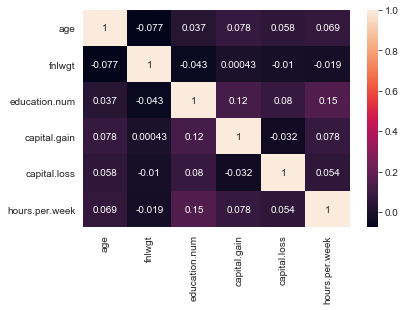

In [80]:
# correlation plot---heatmap
sns.heatmap(cor,annot=True)

## Missing Values

In [81]:
cen.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [82]:
cen.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

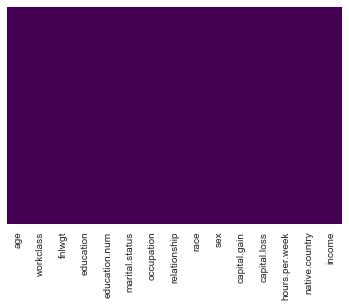

In [83]:
sns.heatmap(cen.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Observation(s)
it is clear visible from Dataset there is no missing values

## Finding Duplicate Rows

In [84]:
print(cen.shape)

# Dropping the duplicate Rows
cen = cen.drop_duplicates(keep = 'first')
cen.shape

(32561, 15)


(32537, 15)

## Observation(s)
form the dataset its clear many rows have duplicate rows

## Obdervaion(s)
Here we seen that there is many duplicate value so remove the duplicate Rows
    

In [85]:
cen['age'].nunique()

73

In [86]:
cen['workclass'].unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [87]:
#Analysis the quality


# To get the count the quality
cen['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

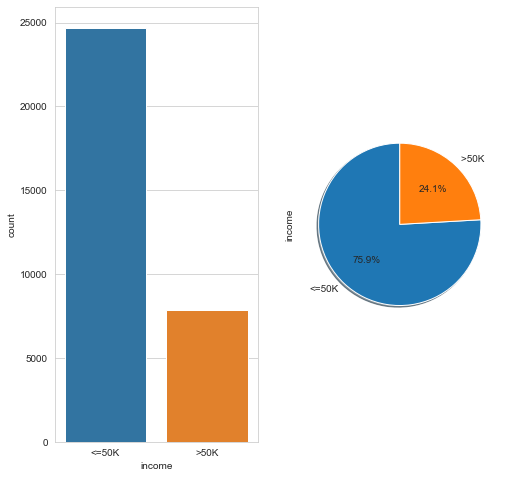

In [88]:
# count -----Plot the frequency of the quality
fig1, ax1 = plt.subplots(1,2,figsize=(8,8))

#It shows the count of observation in each categorical bin using bars

sns.countplot(cen['income'],ax=ax1[0])

labels = '<=50K','>50K '
cen.income.value_counts().plot.pie(labels=labels,autopct ='%1.1f%%',shadow=True, startangle=90)

## Observation(s)e 
As one can see, there is considerable class imbalance in the target variable, i.e. income.It is clear visible 75.9% of people have less then or equal to 50k income and 24 percente of people have more than 50k income per month

In [89]:
#Analysis the quality


# To get the count the quality
cen['native.country'].value_counts()

United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

## Analysis of 'AGE'

In [90]:
# The minimum age of the person
cen.at[cen['age'].idxmin(),'age']

17

### Observation(s)
we have to seen that the minimum age is 17

In [91]:
cen.at[cen['age'].idxmax(),'age']

90

### Observation(s)
we have to seen that the maximum age is 90

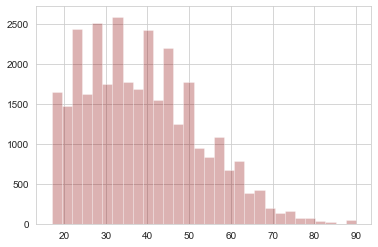

In [92]:
cen['age'].hist(bins=30,color='darkred',alpha=0.3)

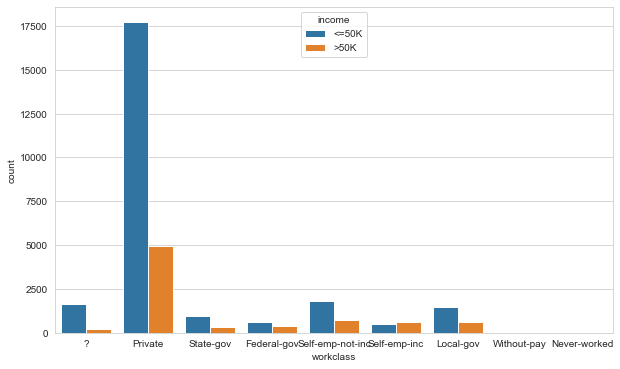

In [93]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x='workclass',hue='income',data=cen)

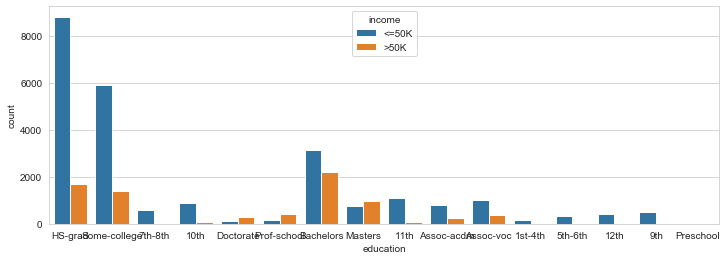

In [94]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,4))
sns.countplot(x='education',hue='income',data=cen)

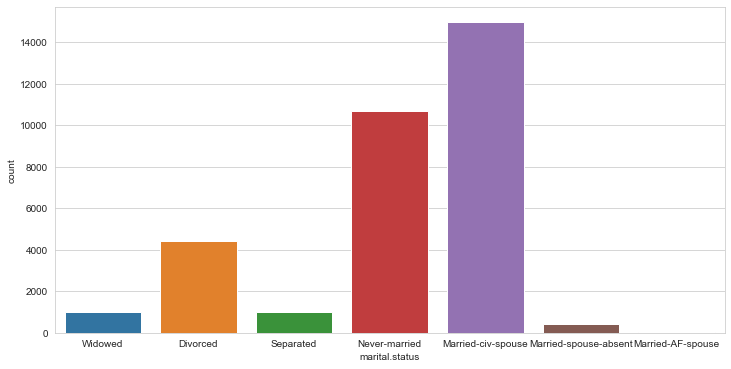

In [95]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.countplot(x='marital.status',data=cen)

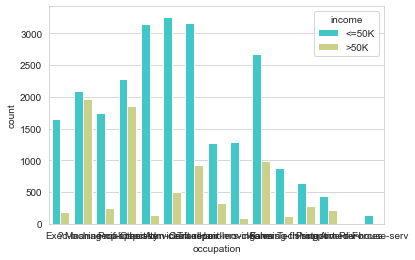

In [96]:
sns.set_style('whitegrid',rc=None)
sns.countplot(x='occupation',hue='income',data=cen,palette='rainbow')

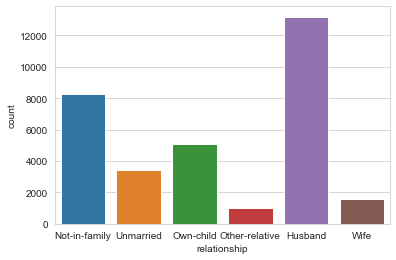

In [97]:
sns.set_style('whitegrid')
sns.countplot(x='relationship',data=cen)

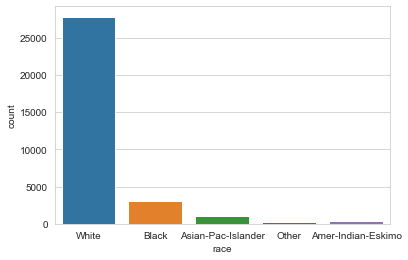

In [98]:
sns.set_style('whitegrid')
sns.countplot(x='race',data=cen)

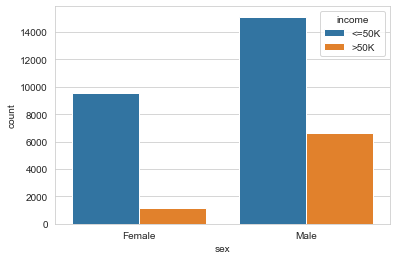

In [99]:
sns.set_style('whitegrid')
sns.countplot(x='sex',hue='income',data=cen)

[4.02833697e-01 4.70725635e-01 1.07416172e-01 1.46602330e-02
 3.13489258e-03 6.14684820e-04 3.07342410e-04 1.53671205e-04
 6.14684820e-05 9.22027231e-05]
[  12285.  159527.  306769.  454011.  601253.  748495.  895737. 1042979.
 1190221. 1337463. 1484705.]


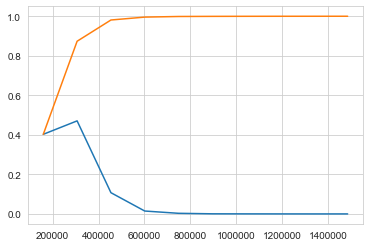

In [100]:
#Plot CDF of fnlwgt
counts, bin_edges = np.histogram(cen['fnlwgt'],bins=10,density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf=np.cumsum(pdf)#cumsum is basicly cumulative sum
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

plt.show();

In [101]:
cen.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

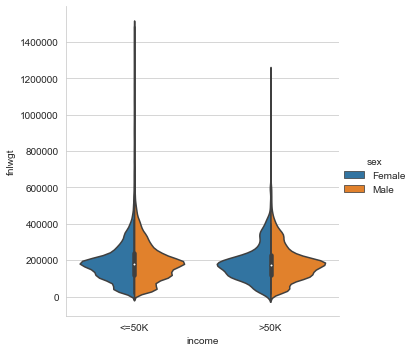

In [102]:
sns.catplot(x='income', y='fnlwgt', hue="sex",
            kind="violin", split=True, data=cen);

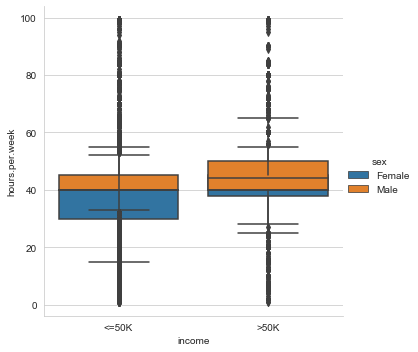

In [103]:
sns.catplot(x='income', y='hours.per.week', hue="sex",
            kind="box", dodge=False, data=cen);

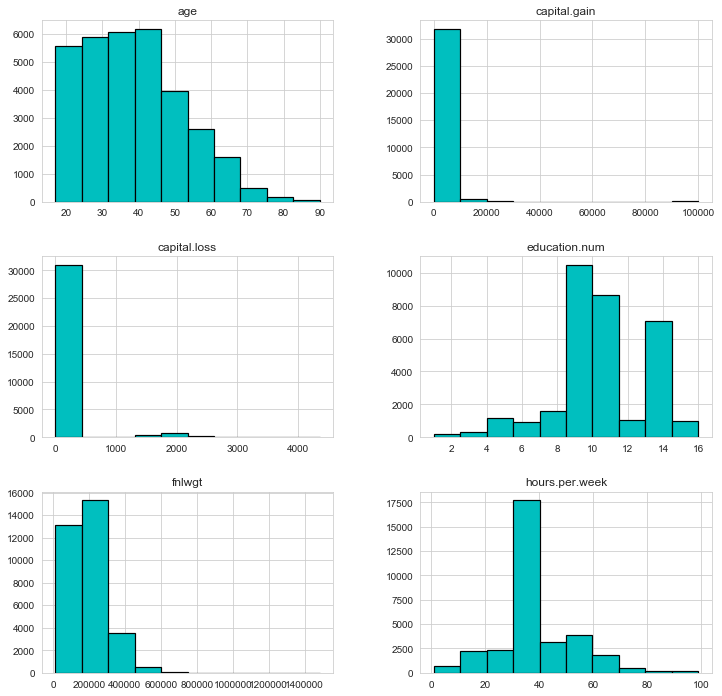

In [104]:
# Distribution of Different Features of the Dataset
distribution = cen.hist(edgecolor = 'black', linewidth = 1.2, color = 'c')
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.show()

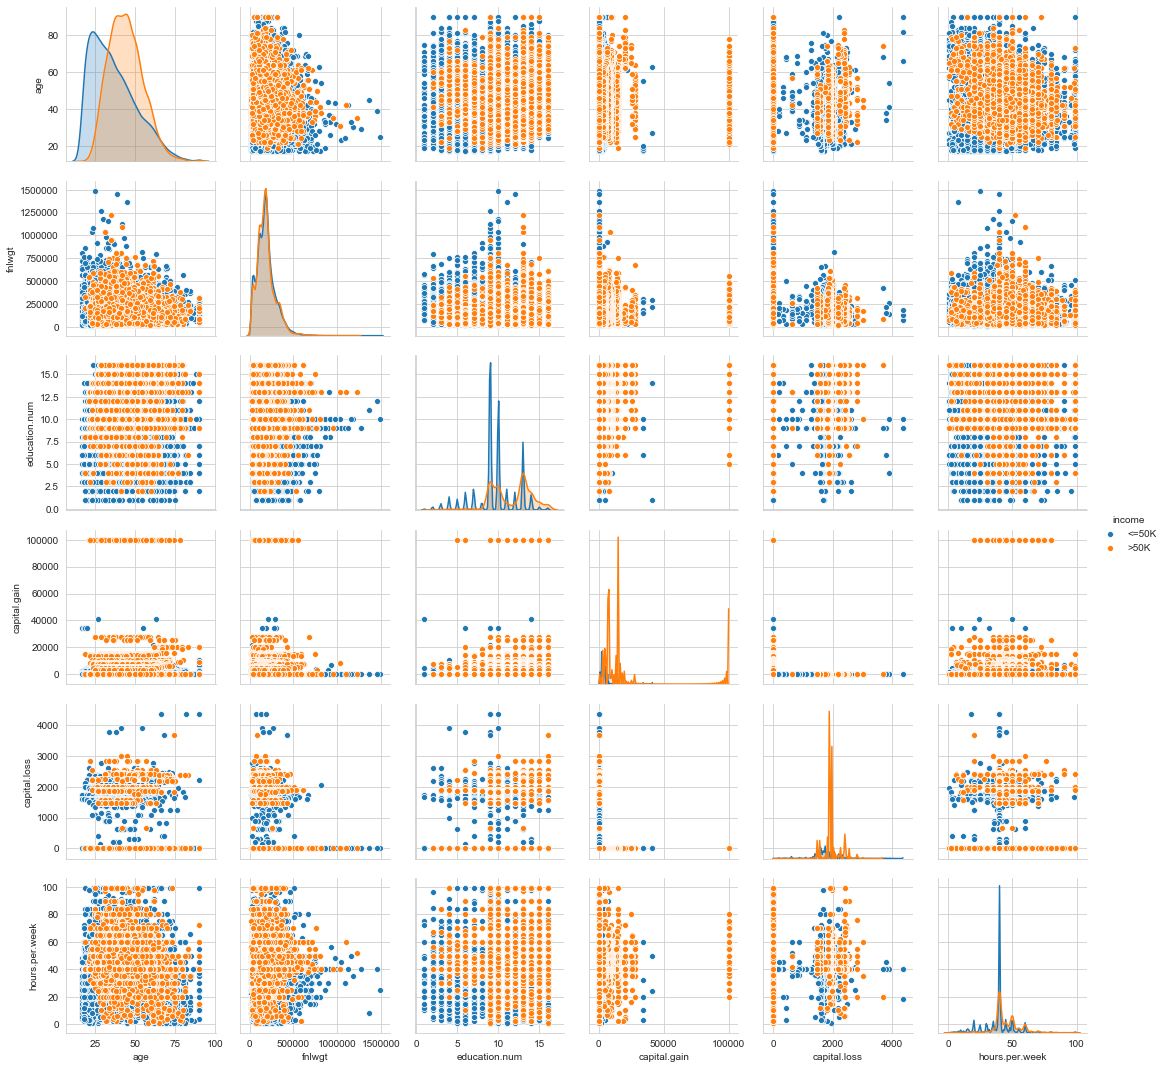

In [105]:
sns.pairplot(cen,hue='income')

## observation(s)
As we can seen that attributes are overlap to each others

## Feature Engineering

### Missing Values

In [106]:
## Replace ? with NaN
cen[cen == '?'] = np.nan

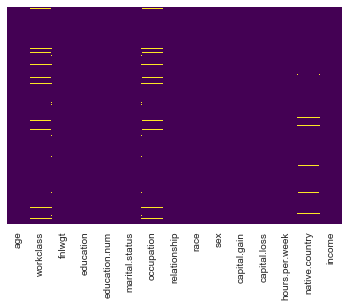

In [107]:
sns.heatmap(cen.isnull(),yticklabels=False,cbar=False,cmap='viridis')

## observation(s)
As we can see that workclass ,0ccupation and nativ country has a missing values so we need to work on i

## Impute missing values with mode

In [108]:
for col in ['workclass', 'occupation', 'native.country']:
    cen[col].fillna(cen[col].mode()[0],inplace=True)

## Check again for missing values

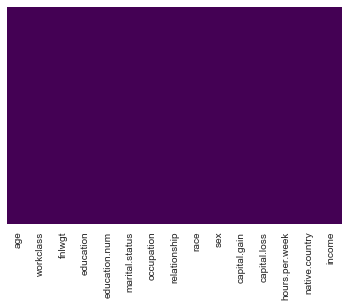

In [109]:
sns.heatmap(cen.isnull(),yticklabels=False,cbar=False,cmap='viridis')

As we can seen that there is no missing values

In [111]:
cen.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### Since the Numercial variables are skewed we will perform log normal distribution

In [112]:
num_features=['age','fnlwgt','hours.per.week']
for feature in num_features:
    cen[feature]=np.log(cen[feature])

In [113]:
cen.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,4.499810,Private,11.252249,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,3.688879,United-States,<=50K
1,4.406719,Private,11.797126,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,2.890372,United-States,<=50K
2,4.189655,Private,12.133830,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,3.688879,United-States,<=50K
3,3.988984,Private,11.851959,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,3.688879,United-States,<=50K
4,3.713572,Private,12.486213,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,3.688879,United-States,<=50K


## Handling a Categorical Variables

In [114]:
# encode categorical variables using Label Encoder
# select all categorical variables
cen_categorical = cen.select_dtypes(include=['object'])
cen_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [115]:
# apply Label encoder to df_categorical
# We will use Label encoder for all categorical variables
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()
cen_categorical = cen_categorical.apply(le.fit_transform)
cen_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,3,11,6,9,1,4,0,38,0
1,3,11,6,3,1,4,0,38,0
2,3,15,6,9,4,2,0,38,0
3,3,5,0,6,4,4,0,38,0
4,3,15,5,9,3,4,0,38,0


In [116]:
# concat df_categorical with original df
cen = cen.drop(cen_categorical.columns, axis=1)
cen = pd.concat([cen, cen_categorical], axis=1)

In [117]:
cen.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,4.499810,11.252249,9,0,4356,3.688879,3,11,6,9,1,4,0,38,0
1,4.406719,11.797126,9,0,4356,2.890372,3,11,6,3,1,4,0,38,0
2,4.189655,12.133830,10,0,4356,3.688879,3,15,6,9,4,2,0,38,0
3,3.988984,11.851959,4,0,3900,3.688879,3,5,0,6,4,4,0,38,0
4,3.713572,12.486213,10,0,3900,3.688879,3,15,5,9,3,4,0,38,0


## Removing Outliers

In [118]:
from scipy.stats import zscore
z_score=abs(zscore(cen))
print(cen.shape)
data=cen[(z_score<3).all(axis=1)]
print(data.shape)

(32537, 15)
(27753, 15)


## Feature Scaling

In [119]:
feature_scale=[feature for feature in data.columns if feature not in ['income']]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(data[feature_scale])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [120]:
scaler.transform(data[feature_scale])

array([[ 1.53199984, -0.02825481,  1.20770473, ...,  0.34937765,
        -1.42054306,  0.18993547],
       [ 1.95148922, -0.19263301,  2.44551511, ...,  0.34937765,
         0.70395613,  0.18993547],
       [ 2.10316689,  0.52404779,  2.03291165, ...,  0.34937765,
         0.70395613,  0.18993547],
       ...,
       [ 0.30253983, -0.08545433, -0.44270911, ...,  0.34937765,
         0.70395613,  0.18993547],
       [ 1.34490696, -0.11158519, -0.44270911, ...,  0.34937765,
        -1.42054306,  0.18993547],
       [-1.37460431,  0.34712859, -0.44270911, ...,  0.34937765,
         0.70395613,  0.18993547]])

In [121]:
df= pd.concat([data[['income']].reset_index(drop=True),
                pd.DataFrame(scaler.transform(data[feature_scale]),columns=feature_scale)],axis=1)

In [122]:
df.head()

,income,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,0,1.532000,-0.028255,1.207705,-0.246626,38.555695,-0.117520,-1.894504,-0.348569,-0.396573,-1.522806,2.216187,0.349378,-1.420543,0.189935
1,0,1.951489,-0.192633,2.445515,-0.246626,38.555695,0.051503,-1.894504,-0.088876,-0.396573,-0.773189,-0.903878,0.349378,0.703956,0.189935
2,0,2.103167,0.524048,2.032912,-0.246626,38.555695,-2.232570,-0.078332,0.949898,-0.396573,0.726047,-0.903878,0.349378,0.703956,0.189935
3,0,1.707392,1.246224,-0.030106,-0.246626,38.555695,-2.232570,-0.078332,1.209591,-0.396573,1.725537,-0.903878,0.349378,0.703956,0.189935
4,0,-0.237131,0.773871,-0.442709,-0.246626,34.874335,0.051503,-1.894504,0.170818,-1.717040,-1.522806,0.968161,0.349378,-1.420543,0.189935


In [123]:
ds=df.drop('income',axis=1)

In [124]:
ds.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,1.532000,-0.028255,1.207705,-0.246626,38.555695,-0.117520,-1.894504,-0.348569,-0.396573,-1.522806,2.216187,0.349378,-1.420543,0.189935
1,1.951489,-0.192633,2.445515,-0.246626,38.555695,0.051503,-1.894504,-0.088876,-0.396573,-0.773189,-0.903878,0.349378,0.703956,0.189935
2,2.103167,0.524048,2.032912,-0.246626,38.555695,-2.232570,-0.078332,0.949898,-0.396573,0.726047,-0.903878,0.349378,0.703956,0.189935
3,1.707392,1.246224,-0.030106,-0.246626,38.555695,-2.232570,-0.078332,1.209591,-0.396573,1.725537,-0.903878,0.349378,0.703956,0.189935
4,-0.237131,0.773871,-0.442709,-0.246626,34.874335,0.051503,-1.894504,0.170818,-1.717040,-1.522806,0.968161,0.349378,-1.420543,0.189935


In [125]:
from sklearn.decomposition import PCA

In [126]:
pca=PCA(n_components=4)

In [127]:
pca.fit(ds)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [128]:
x=pca.transform(ds)

In [129]:
x.shape

(27753, 4)

In [130]:
y=df['income']

In [131]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

In [137]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)


## KNeighborsClassifier

In [138]:
#import the classifier
from sklearn.neighbors import KNeighborsClassifier
# create an instance
knn = KNeighborsClassifier()
# train the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [142]:
# predict the outcome for test data
y_pred = knn.predict(X_test)
# import the metric
from sklearn.metrics import accuracy_score
#caluculate the test data accuracy
print('test accuracy score',\
      accuracy_score(y_test,y_pred))

test accuracy score 0.818050801657359


In [143]:
# predict the outcome for test data
y_train_pred = knn.predict(X_train)
#caluculate the test data accuracy
print('train  accuracy score',\
      accuracy_score(y_train,y_train_pred))

train  accuracy score 0.8710476533645618


In [157]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('\n')

[[3929  394]
 [ 616  612]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4323
           1       0.61      0.50      0.55      1228

    accuracy                           0.82      5551
   macro avg       0.74      0.70      0.72      5551
weighted avg       0.81      0.82      0.81      5551





### Use K Fold cross validation to measure accuracy of our KNeighborsClassifier model

In [156]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score( KNeighborsClassifier(),x,y,cv=cv)

array([0.81282652, 0.82399568, 0.80886327, 0.81678977, 0.81408755])

### We can see that in 5 iterations we get a score above 80%  all the time. This is pretty good but we want to test few other algorithms for Classification to see if we can get even better score. We will use GridSearchCV for this purpose

## Applying Logistic Regression Classifier

In [144]:
from sklearn.linear_model import LogisticRegression
Lr =  LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
# predict the outcome for test data
y_predic = knn.predict(X_test)
# import the metric
from sklearn.metrics import accuracy_score
#caluculate the test data accuracy
print('test accuracy score',\
      accuracy_score(y_test,y_predic))

test accuracy score 0.818050801657359


In [171]:
# predict the outcome for test data
y_trn_pred = knn.predict(X_train)
#caluculate the test data accuracy
print('train  accuracy score',\
      accuracy_score(y_train,y_trn_pred))

train  accuracy score 0.8710476533645618


In [172]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_predic))
print('\n')

[[3929  394]
 [ 616  612]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4323
           1       0.61      0.50      0.55      1228

    accuracy                           0.82      5551
   macro avg       0.74      0.70      0.72      5551
weighted avg       0.81      0.82      0.81      5551





### Use K Fold cross validation to measure accuracy of our LogisticRegression model

In [153]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LogisticRegression(),x,y,cv=cv)

array([0.81660962, 0.82759863, 0.8180508 , 0.82255449, 0.82273464])

## DecisionTreeClassifier

In [175]:
#import the classifier
from sklearn.tree import DecisionTreeClassifier
# create an instance
dt = DecisionTreeClassifier()
# train the model
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [176]:
# predict the outcome for test data
y_pred = dt.predict(X_test)
# import the metric
from sklearn.metrics import accuracy_score
#caluculate the test data accuracy
print('test accuracy score',\
      accuracy_score(y_test,y_pred))

test accuracy score 0.7785984507295983


In [177]:
# predict the outcome for test data
y_train_pred = dt.predict(X_train)
#caluculate the test data accuracy
print('train  accuracy score',\
      accuracy_score(y_train,y_train_pred))

train  accuracy score 1.0


### Use K Fold cross validation to measure accuracy of our DecisionTreeClassifier model

In [178]:
## ShuffleSplit it use forspliting a data in equal amount
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(DecisionTreeClassifier(),x,y,cv=cv)

array([0.76544767, 0.77571609, 0.77157269, 0.77625653, 0.77103225])

## Find best model using GridSearchCV

In [161]:
from sklearn.model_selection import GridSearchCV

In [162]:
## For LogisticRegression
params = {
    'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}
grid_search = GridSearchCV(estimator=LogisticRegression(),param_grid=params,n_jobs=-1,cv=10)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
       

In [163]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 0.00026366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
0.8211422394378884


In [164]:
## Grid search for KNeighborsClassifier
params = [{'n_neighbors': list(range(1,20)),
'weights': ['distance'],
'algorithm': ['kd_tree']}]

grid_search = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,n_jobs=-1)
grid_search.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid=[{'algorithm': ['kd_tree'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19],
                          'weights': ['distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [165]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8259616250788218
{'algorithm': 'kd_tree', 'n_neighbors': 17, 'weights': 'distance'}


In [173]:
##   Gridsearch for DecisionTreeClassifier
params = {
"criterion" : ['gini', 'entropy'],
"max_depth" : [4,6,8,12,13,15,17],
}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params,n_jobs=-1)
grid_search.fit(X_train,y_train)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12, 13, 15, 17]},
        

In [174]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.8254661742185389
{'criterion': 'entropy', 'max_depth': 6}


#### Based on above results we can say that KNeighborsClassifier gives the best score. Hence we will use that.

## Export the tested model to a pickle file

In [179]:
import pickle
with open('Census_Income_model.pickle','wb') as f:
    pickle.dump(knn,f)